# Section 1: Analysis

A friend of yours owns an frozen drink shop. On hot days, she seems extra happy. She says that she sees a line extending around the block and knows that means more sales. However, even before your friend started the business, she always seemed to love summer and thrived in the heat, so you think her jubilant attitude might be intrinsic. She makes a bet with you that sales really are higher on hotter days. She gets data on the sales numbers (in dollars) and the daily temperatures (in degrees Fahrenheit).

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_excel("drinks.xlsx")

**1. What is the outcome?**

As the temperature increasing, the sales of the frozen shop become better.

**2. What is the main effect/predictor she wants to understand the impact of?**

The main effect/predictor she wants to know should be sales and temperature.

**3. What is the hypothesis?**

As the temperature rising, sales of the frozen drink shop increase.

**Use the data she collected to conduct an analysis, test the hypothesis, and report results. The dataset is drinks.xlsx. Your analysis should have the following elements:**

**4. An explanation of why the analysis is being conducted and what the hypothesis is**

Since my friend wants to find out the relationship between summer and sales, i decide to conduct correlation analysis first.

**5. Descriptive information about the data, including summary statistics (such as number of observations, measures of central tendency, & measures of dispersion) and plots of the data distributions**

       Temperature_F        Sales
count     180.000000   180.000000
mean       79.305556  2936.382022
std        10.375679   397.106574
min        57.000000  1959.000000
25%        71.750000  2657.500000
50%        79.000000  2954.500000
75%        87.000000  3197.250000
max       105.000000  3971.000000


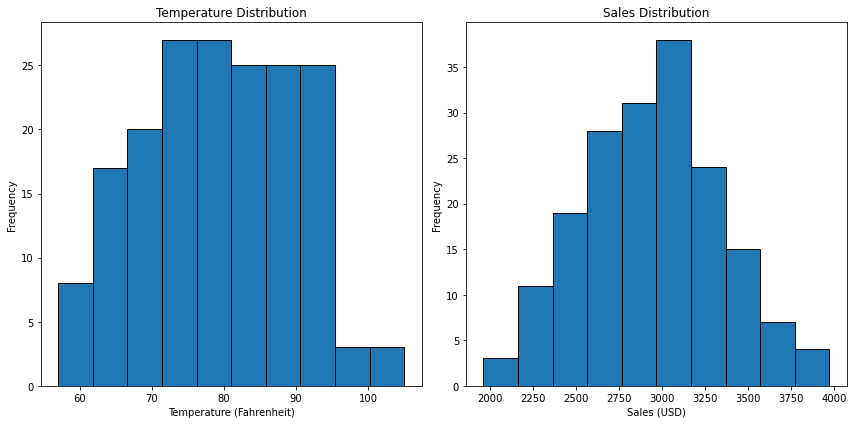

In [22]:
summary_stats = data.describe()
print(summary_stats)

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['Temperature_F'], bins = 10, edgecolor = 'black')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['Sales'], bins = 10, edgecolor = 'black')
plt.xlabel('Sales (USD)')
plt.ylabel('Frequency')
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()

**6. Descriptive information about the relationships between the two variables, including correlation and scatterplots**

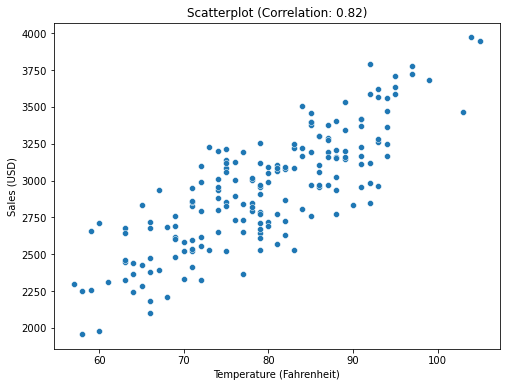

Correlation Coefficient: 0.82


In [21]:
correlation_coefficient = data['Temperature_F'].corr(data['Sales'])

plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Temperature_F', y = 'Sales', data = data)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Sales (USD)')
plt.title(f'Scatterplot (Correlation: {correlation_coefficient:.2f})')

plt.show()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

**7. A regression analysis to test the hypothesis. If you have trouble getting the regression analysis to work, look closely at the data. Your friend wasn’t always able to get sales data for each day. Choose a method to handle rows with missing data.**

In [25]:
print("Missing Values:")
print(data.isnull().sum())

data = data.dropna()

X = sm.add_constant(data['Temperature_F'])

model = sm.OLS(data['Sales'], X)
results = model.fit()

print(results.summary())

Missing Values:
Temperature_F    0
Sales            0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     363.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.73e-45
Time:                        20:59:28   Log-Likelihood:                -1232.0
No. Observations:                 180   AIC:                             2468.
Df Residuals:                     178   BIC:                             2474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**11. A description of the results of the analysis. Included in this description should be an interpretation of the coefficients, description of the goodness of fit, and a discussion of whether the results are statistically significant.**

The p-value is low, which means warmer days often lead to more sales. A high R² suggests that temperature is a good way to guess how sales will change. When the confidence interval doesn't include zero, it backs up the idea that temperature is really connected to sales.

# Section 2: Gradient Descent

**Write a program in Python that uses gradient descent to find the regression coefficients (bs) for the frozen custard data in Section 1. There are many examples of how to do this on the internet. Most of these examples use the np.dot rather than np.matmul. Make sure your program uses np.matmul instead.**

**1. Cite the source you used**

https://github.com/Arko98/Gradient-Descent-Algorithms

**2. This problem is an example of how gradient descent can fail with raw data. There are more sophisticated modifications to gradient descent that address those failures. When you try this problem, it will not converge. Try it anyway and graph the loss function over 1000 iterations so that you can see what is happening. Produce 3 graphs of iterations (x) and loss (y) for 3 learning rates (0.1, 0.01, 0.001)**

/var/folders/rn/rzrf8y593mn_8ym_f6tm249m0000gn/T/ipykernel_16420/709103714.py:24: RuntimeWarning: invalid value encountered in double_scalars
  b1 -= learning_rate * np.mean(error * X)
/var/folders/rn/rzrf8y593mn_8ym_f6tm249m0000gn/T/ipykernel_16420/709103714.py:25: RuntimeWarning: invalid value encountered in double_scalars
  b0 -= learning_rate * np.mean(error)


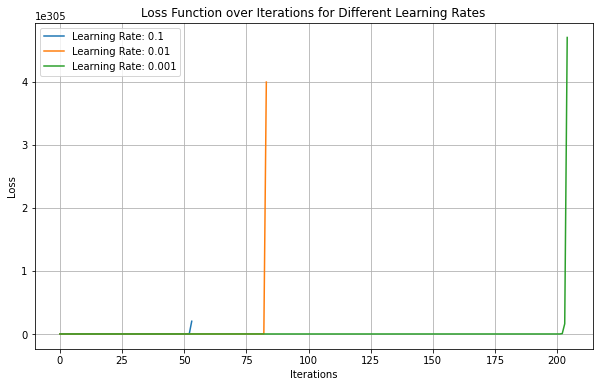

In [44]:
X = data['Temperature_F']
y = data['Sales']

b0 = 0
b1 = 0

learning_rates = [0.1, 0.01, 0.001]
iterations = 1000

losses = []

def gradient_descent(X, y, learning_rate, iterations):
    b0 = 0
    b1 = 0
    loss_history = []

    for i in range(iterations):
        y_pred = b1 * X + b0

        error = y_pred - y
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        b1 -= learning_rate * np.mean(error * X)
        b0 -= learning_rate * np.mean(error)

    return loss_history

for learning_rate in learning_rates:
    loss_history = gradient_descent(X, y, learning_rate, iterations)
    losses.append(loss_history)

plt.figure(figsize = (10, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(range(iterations), losses[i], label = f'Learning Rate: {learning_rate}')

plt.title('Loss Function over Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**3. Standardize your X and Y variables. To do this, subtract the mean from each value and divide it by the standard deviation. Please note that the input array for X needs to have a column of 1’s in it. Do not standardize the 1’s.**

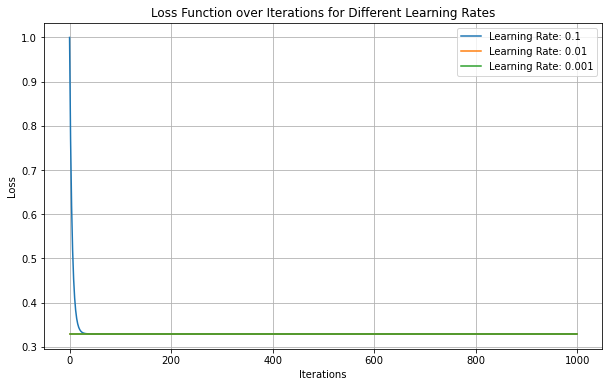

In [45]:
X_std = (X - np.mean(X)) / np.std(X)
y_std = (y - np.mean(y)) / np.std(y)

X_std = np.column_stack((np.ones(len(X_std)), X_std))

b = np.zeros(X_std.shape[1])

learning_rates = [0.1, 0.01, 0.001]
iterations = 1000

losses = []

def gradient_descent_new(X, y, b, learning_rate, iterations):
    loss_history = []

    for _ in range(iterations):
        y_pred = np.matmul(X, b)

        error = y_pred - y
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        gradient = np.matmul(X.T, error) / len(X)
        b -= learning_rate * gradient

    return b, loss_history

for learning_rate in learning_rates:
    loss_history = gradient_descent_new(X_std, y_std, b, learning_rate, iterations)[1]
    losses.append(loss_history)

plt.figure(figsize = (10, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(range(iterations), losses[i], label = f'Learning Rate: {learning_rate}')

plt.title('Loss Function over Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**4. Rerun your section 1 model using the standardized inputs and 2 different learning rates (0.01, 0.001). Compare your results using gradient descent and using the module you used in Section 1 for the standardized inputs.**

In [52]:
x = data["Temperature_F"].values
y = data["Sales"].values

x = (x-np.mean(x))/np.std(x)
y = (y-np.mean(y))/np.std(y)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
display(model.summary())

y = y.reshape(-1,1)
lrs = [0.01, 0.001]

def gradient_descent(X, Y, W, lr, iter=1000):
    w = W
    n = len(X)
    loss_list = []
    for i in range(iter):
        y_pred = np.matmul(x, w)
        gradient = (2/n) * (X.T @ (y_pred-Y))
        w = w - lr * gradient
        loss =np.sum((y_pred - Y)**2)/n
        loss_list.append(loss)
    return w, loss_list

for lr in lrs:
    w = np.zeros((x.shape[1], 1))
    w, loss_list = gradient_descent(x, y, w, lr)
    print(f"lr = {lr} \n coefficeint of constant = {w[0][0]:.4f} \n coefficient of temperature = {w[1][0]:.4f}")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     363.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.73e-45
Time:                        23:05:58   Log-Likelihood:                -155.35
No. Observations:                 180   AIC:                             314.7
Df Residuals:                     178   BIC:                             321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.238e-16      0.043  -5.21e-15      1.000      -0.085       0.085
x1             0.8192      0.043     19.055      0.000       0.734       0.904
==============================================================================
Omnibus:                        8.425   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                4.277
Skew:                          -0.134   Prob(JB):                        0.118
Kurtosis:                       2.294   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

lr = 0.01 
 coefficeint of constant = -0.0000 
 coefficient of temperature = 0.8192
lr = 0.001 
 coefficeint of constant = -0.0000 
 coefficient of temperature = 0.7085


**5. Plot the loss (i.e. cost) function over the iterations for both learning rates on the same graph**

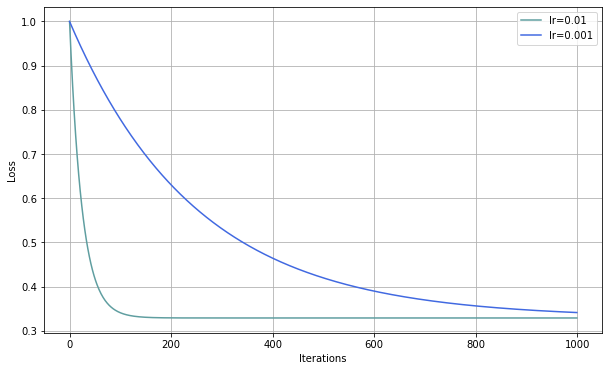

In [53]:
w = np.zeros((x.shape[1],1))
w1, loss_list1 = gradient_descent(x, y, w, lr = 0.01)
w2, loss_list2 = gradient_descent(x, y, w, lr = 0.001)

plt.figure(figsize=(10,6))
plt.plot(range(1000), loss_list1, label = "lr=0.01", color = "cadetblue")
plt.plot(range(1000), loss_list2, label = "lr=0.001", color = "royalblue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()